In [ ]:
import cv2
import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train  = x_train/255
x_test = x_test/255
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
inputImg = layers.Input(shape=(None,None,1),name="inputLayer",dtype="float")
x=layers.Conv2D(16,(3,3),activation="relu",padding="same")(inputImg)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(64,(3,3),activation="relu",padding="same")(x)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(num_classes,(1,1),activation="relu",padding="same")(x)
x=layers.GlobalAveragePooling2D()(x)
#out=layers.Dense(num_classes,activation="softmax")(x)
out=layers.Activation("softmax")(x)

model = keras.Model(inputImg,out)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, None, None, 1)]   0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 16)    160       
                                                                 
 average_pooling2d (AverageP  (None, None, None, 16)   0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, None, None, 16)   64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    4640      
                                                                 
 average_pooling2d_1 (Averag  (None, None, None, 32)   0     

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("model-{epoch:03d}-{accuracy}-{val_accuracy}.h5",save_best_only=True,monitor="val_accuracy")
model.fit(x_train,y_train,epochs=20,batch_size=20,validation_split=0.1,callbacks=[checkpoint])

Epoch 1/20
2700/2700 [==============================] - 28s 7ms/step - loss: 0.1776 - accuracy: 0.9576 - val_loss: 0.0569 - val_accuracy: 0.9828
Epoch 2/20
2700/2700 [==============================] - 17s 6ms/step - loss: 0.0551 - accuracy: 0.9838 - val_loss: 0.0678 - val_accuracy: 0.9808
Epoch 3/20
2700/2700 [==============================] - 18s 7ms/step - loss: 0.0422 - accuracy: 0.9876 - val_loss: 0.0434 - val_accuracy: 0.9865
Epoch 4/20
2700/2700 [==============================] - 18s 7ms/step - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0500 - val_accuracy: 0.9845
Epoch 5/20
2700/2700 [==============================] - 18s 7ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0412 - val_accuracy: 0.9890
Epoch 6/20
2700/2700 [==============================] - 18s 7ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0299 - val_accuracy: 0.9917
Epoch 7/20
2700/2700 [==============================] - 18s 7ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0267 - val_ac

In [ ]:
predictionModel = keras.models.load_model("model-008-0.9945555329322815-0.9940000176429749.h5")

In [ ]:
selection = 35
print("gt                :",np.argmax(y_test[:selection],axis=1))
pred =  np.argmax(predictionModel.predict(x_test[:selection]),axis=1)
upScale32=[]
for i in range(selection):
  img=cv2.resize(x_test[i],(32,32))
  upScale32.append(img)
upScale32 = np.array(upScale32)
predUpScale32 = np.argmax(predictionModel.predict(upScale32),axis=1)
print("original size     :",pred)
print("scaled to (32,32) :",predUpScale32)

gt                : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]
original size     : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]
scaled to (32,32) : [7 2 1 0 4 1 4 4 5 9 0 6 9 0 1 5 9 7 5 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]


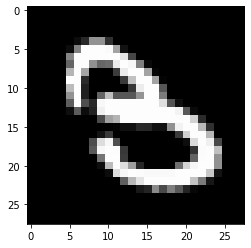

In [ ]:
plt.imshow(x_test[18].squeeze(),cmap="gray")

In [ ]:
selection = 35
print("gt                :",np.argmax(y_test[:selection],axis=1))
pred =  np.argmax(predictionModel.predict(x_test[:selection]),axis=1)
dnScale24=[]
for i in range(selection):
  img=cv2.resize(x_test[i],(24,24))
  dnScale24.append(img)
dnScale24 = np.array(dnScale24)
predDnScale24 = np.argmax(predictionModel.predict(dnScale24),axis=1)
print("original size     :",pred)
print("scaled to (32,32) :",predDnScale24)

gt                : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]
original size     : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]
scaled to (32,32) : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]


In [ ]:
plt.imshow(x_test[18].squeeze(),cmap="gray")

In [ ]:
selection = 35
print("gt                :",np.argmax(y_test[:selection],axis=1))
pred =  np.argmax(predictionModel.predict(x_test[:selection]),axis=1)
upScale48=[]
for i in range(selection):
  img=cv2.resize(x_test[i],(48,48))
  upScale48.append(img)
upScale48 = np.array(upScale48)
predUpScale48 = np.argmax(predictionModel.predict(upScale48),axis=1)
print("original size     :",pred)
print("scaled to (32,32) :",predUpScale48)

gt                : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]
original size     : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]
scaled to (32,32) : [1 7 1 4 1 1 4 1 7 1 1 1 1 1 1 0 1 1 7 1 1 1 4 7 1 4 1 1 4 1 1 1 2 1 1]
